In [163]:

# Initial imports
import os
import requests 
import pandas as pd
import json
from dotenv import load_dotenv
from pathlib import Path
import numpy as np
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import shrimpy
import os
import datetime

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


import requests
response = requests.get("https://api.coinbase/v2/currencies")
print(response.status_code)

In [164]:
# Use the Pathlib libary to set the path to the CSV
df_USD = Path("../Rina/FIAT_USD.csv")
df_Bitcoin = Path("../Rina/BTC-USD.csv")

USD_df = pd.read_csv(df_USD)

#Make date index column
Bitcoin_df = pd.read_csv(df_Bitcoin)




In [165]:
#USD_df

In [166]:
Bitcoin_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2553,2021-09-13,46057.214844,46598.679688,43591.320313,44963.074219,44963.074219,4.096994e+10
2554,2021-09-14,44960.050781,47218.125000,44752.332031,47092.492188,47092.492188,3.865215e+10
2555,2021-09-15,47098.000000,48450.468750,46773.328125,48176.347656,48176.347656,3.048450e+10
2556,2021-09-16,48158.906250,48486.828125,47079.558594,47783.359375,47783.359375,3.176429e+10


In [212]:
#create volume df
#btc_vlum = (Bitcoin_df[["Volume"]].groupby(["Date"]).sum())
#btc_vlum



#btc_vlum_per_yr = Bitcoin_df['Volume'].groupby(Bitcoin_df.index).mean()
#btc_vlum_per_yr

#df_Bitcoin_volume = Path("/Users/xbook/Desktop/Bootcamp/FinTech/Project1-/Project1-/BTC-USD-volume.csv")
#df_Bitcoin_volume = pd.read_csv(df_Bitcoin_volume)


df_Bitcoin_volume = Path("/Users/xbook/Desktop/Bootcamp/FinTech/Project1-/Project1-/BTC-USD-volume.csv")
df_Bitcoin_volume = pd.read_csv(df_Bitcoin_volume, index_col="Date")

df_Bitcoin_volume

,Volume
Date,
2014,2.526711e+09
2015,1.237553e+10
2016,3.144837e+10
2017,8.697460e+11
2018,2.213200e+12
2019,6.106630e+12
2020,2.844360e+12
2021,1.360230e+13


<Figure size 432x288 with 0 Axes>

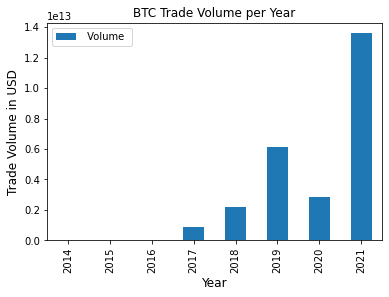

In [213]:
#Bar chart to depict creation years

fig_btc_vlm_pyr = plt.figure()
plot_Bitcoin_volume = df_Bitcoin_volume.plot.bar()
plot_Bitcoin_volume.set_xlabel("Year", fontsize=12)
plot_Bitcoin_volume.set_ylabel("Trade Volume in USD", fontsize=12)
plot_Bitcoin_volume.set_title( "BTC Trade Volume per Year");


# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
#btc_vlm_pyr_std = df_Bitcoin_volume.std()
#btc_vlm_pyr_min = min(df_Bitcoin_volume)
#btc_vlm_pyr_max = max(df_Bitcoin_volume)

#print(units_pyr_std)
#plot_btc_vlm_pyr.set_ylim(btc_vlm_pyr_min - btc_vlm_pyr_std, btc_vlm_pyr_max + btc_vlm_pyr_std)
plt.show()
plt.close(fig_btc_vlm_pyr)


<Figure size 432x288 with 0 Axes>

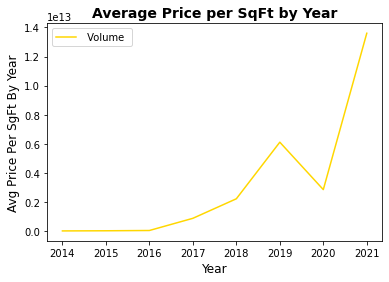

In [214]:
fig = plt.figure()
bar_chart = df_Bitcoin_volume.plot(color='gold')
bar_chart.set_xlabel('Year', fontsize=12)
bar_chart.set_ylabel('Avg Price Per SgFt By Year', fontsize=12)
bar_chart.set_title('Average Price per SqFt by Year', fontsize=14, fontweight="bold")
plt.show()
plt.close(fig)


In [121]:
#import requests
#response = requests.get("https://api.exchange.coinbase.com/currencies")
#print(response.status_code)


In [117]:

#dictionary = json.dumps(response.json(), sort_keys = True, indent = 4)
crypto_types = response.json()
#print(crypto_types[0])
crypto_list = []
for crypto_type in crypto_types:
    id1 = crypto_type['id']
    name = crypto_type['name']
    type1 = crypto_type['details']['type']
    symbol = crypto_type['details']['symbol']
    min_size = crypto_type
    group_types = crypto_type ['details']['group_types'] 
    crypto_list.append({"id": id1, "name": name, "type": type1, "symbol": symbol, "group_types": group_types})
crypto_df = pd.DataFrame(crypto_list)
crypto_df
    

,id,name,type,symbol,group_types
0,AUCTION,Bounce Token,crypto,,[]
1,COTI,COTI,crypto,,[]
2,PERP,Perpetual Protocol,crypto,,[]
3,DDX,DerivaDAO,crypto,,[]
4,RAD,Radicle,crypto,,[]
...,...,...,...,...,...
112,OXT,Orchid,crypto,,[]
113,PLA,PlayDapp,crypto,,[]
114,REP,Augur,crypto,,[]
115,REQ,Request,crypto,,[]


In [118]:
#confirm API endpoint is working
response = requests.get("https://dev-api.shrimpy.io/v1/list_exchanges")
print(response.status_code)



200


In [215]:
#authentication again 
public_key = '1b613982148bb8c63ab73e51942b1aef82a77c3e9ae8125a189349a938ec15a6'
secret_key = 'a20fca7845fc4e057496ffd57f1af0faa906899d8c4b38c1ce904c59546fdc82ffc9962514d2e3b84badec2127e7c380a5550737de49e6ad31559389b2232db5'
client = shrimpy.ShrimpyApiClient(public_key, secret_key)
#get candle data for LTC BTC using Binance exchange
candles = client.get_historical_candles(
    'Binance', #exchange
    'LTC', #baseTradingSymbol
    'BTC', #quoteTradingSymbol
    '2000-05-19T00:00:00.000Z', #start time
    '2019-05-20T00:00:00.000Z', #end time
    1000, #limit, number of items return between 1-1000
    '1D' #interval must be 1m,5m,15m,1h,6h, or 1d
)
print(candles)

{'error': 'Not enough credits. Please purchase more credits.'}


In [120]:
#HELLO RINA WE ARE TRYING TO FIX THIS